In [1]:
projPath_save = '/home/alvaro/notebook/jupyterenv/bin/TFM/CODIGO/test_tfm_code_test/'

In [2]:
Path_df='/home/alvaro/notebook/jupyterenv/bin/TFM/CODIGO/test_tfm_code_test/202206_DM_df_aux1_test.csv'

In [3]:
rawAISpath = '/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/raw/'

In [4]:
month = '202206'

In [5]:
darsena = '_DM'

In [6]:
buffer_basin = 20 #m
buffer_dock = 30 #m
buffer_basin1 = 150 #m

min_points = 10

In [7]:
import numpy as np
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib notebook

In [9]:
moll_map = gpd.read_file('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/maps/MollsDarsenaMorrot_noTalo.shp')
dm_map = gpd.read_file('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/maps/DarsenaMorrot.shp')

In [10]:
dm_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
dm_buffer = gpd.GeoDataFrame(geometry = dm_map.to_crs(32631).buffer(buffer_basin).to_crs(4326))
dm_buffer.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
dm_buffer_z2 = gpd.GeoDataFrame(geometry = dm_map.to_crs(32631).buffer(buffer_basin1).to_crs(4326))
dm_buffer_z2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
moll_buffer = gpd.GeoDataFrame(geometry = moll_map.to_crs(32631).buffer(buffer_dock, cap_style = 2,join_style = 2).to_crs(4326))

<IPython.core.display.Javascript object>


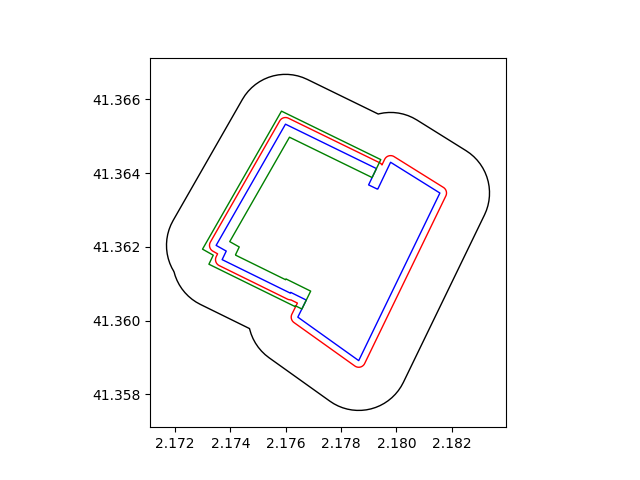

<AxesSubplot:>

In [14]:
fig, ax = plt.subplots()
dm_map.plot(ax = ax, fc = 'none', ec = 'blue')
dm_buffer.plot(ax = ax, fc = 'none', ec = 'red')
moll_buffer.plot(ax = ax, fc = 'none', ec = 'green')
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')

In [15]:
lonmin = dm_buffer.geometry.bounds.minx[0]
lonmax = dm_buffer.geometry.bounds.maxx[0]
latmin = dm_buffer.geometry.bounds.miny[0]
latmax = dm_buffer.geometry.bounds.maxy[0]

# LOAD PREVIOUS DATA

In [16]:
df_aux=pd.read_csv(Path_df)

In [17]:
df_aux.loc[df_aux['shiptype'].isin([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 80, 89]),:]

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,index,shipname,shiptype,draught,to_bow,to_stern,to_starboard,to_port,imo
0,2022-06-01 00:00:06,224878000,0,NaN,0.0,2.17964,41.36394,238.2,NaN,2022-06-01,836,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
1,2022-06-01 00:00:16,224878000,0,NaN,0.0,2.17964,41.36394,238.2,NaN,2022-06-01,836,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
2,2022-06-01 00:00:27,224878000,0,NaN,0.0,2.17964,41.36393,238.2,NaN,2022-06-01,836,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
3,2022-06-01 00:00:37,224878000,0,NaN,0.0,2.17964,41.36393,238.2,NaN,2022-06-01,836,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
4,2022-06-01 00:00:47,224878000,0,NaN,0.0,2.17964,41.36393,238.2,NaN,2022-06-01,836,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210924,2022-06-30 21:44:27,224878000,0,NaN,47.0,2.17792,41.36021,211.3,NaN,2022-06-30,865,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
210925,2022-06-30 21:44:35,224878000,0,NaN,47.0,2.17778,41.36003,212.0,NaN,2022-06-30,865,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
210926,2022-06-30 21:44:45,224878000,0,NaN,47.0,2.17763,41.35986,212.6,NaN,2022-06-30,865,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382
210927,2022-06-30 21:44:57,224878000,0,NaN,47.0,2.17745,41.35964,213.2,NaN,2022-06-30,865,SPABUNKER 41,89,5.5,1.0,1.0,3.0,2.0,9127382


<IPython.core.display.Javascript object>


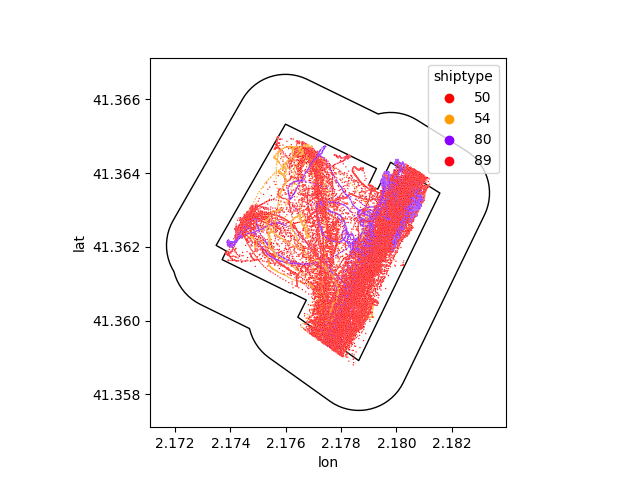

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [34]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = df_aux.loc[df_aux['shiptype'].isin([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 80, 89]),:], x = 'lon',y = 'lat', s = 1, hue = 'shiptype', palette = 'hsv')

In [23]:
df_aux_filter = df_aux[~df_aux.shiptype.isin([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 80, 89])]


In [25]:
df_aux_filter.head()

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,index,shipname,shiptype,draught,to_bow,to_stern,to_starboard,to_port,imo
746,2022-06-01 01:05:20,247383500,0,-12.0,30.0,2.17737,41.35946,23.7,20.0,2022-06-01,1292,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
747,2022-06-01 01:05:30,247383500,0,-12.0,30.0,2.17744,41.35959,23.1,19.0,2022-06-01,1292,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
748,2022-06-01 01:05:40,247383500,0,-13.0,29.0,2.17752,41.35972,22.4,18.0,2022-06-01,1292,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
749,2022-06-01 01:05:49,247383500,0,-14.0,29.0,2.17758,41.35983,21.6,17.0,2022-06-01,1292,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
750,2022-06-01 01:05:59,247383500,0,-14.0,28.0,2.17764,41.35996,20.8,15.0,2022-06-01,1292,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557


<IPython.core.display.Javascript object>


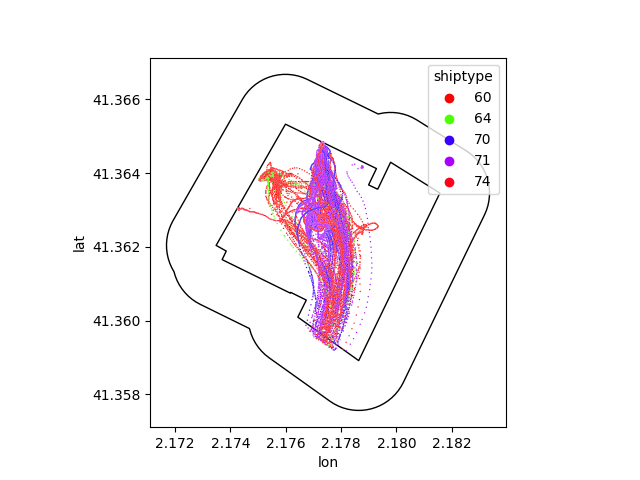

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [32]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = df_aux_filter, x = 'lon',y = 'lat', s = 1, hue = 'shiptype', palette = 'hsv')

In [35]:
df_aux_filter['mmsi'].unique()

array([247383500, 247383600, 247219400, 247383400, 247243600, 247383300,
       209115000, 210117000])

# New data transformation

## Load Dynamic data

In [36]:
dfA = pd.read_csv(rawAISpath + month + '/filtered_ClassA.csv')
dfA.drop(columns = 'second_sent', inplace = True) #borra una columna
len(dfA)

11527296

Remove rows with empty mmsi

In [37]:
dfA = dfA.loc[~dfA.mmsi.isnull()].copy()
len(dfA)

11527296

Arrange data time

In [38]:
dfA.rename(columns={'date':'time_stamp'}, inplace = True)

In [39]:
dfA['time_stamp'] = pd.to_datetime(dfA['time_stamp'], format = '%Y%m%d%H%M%S')

In [40]:
dfA['day'] = dfA.time_stamp.dt.date

In [41]:
dfA.head()

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day
0,2022-06-01 00:00:00,255801940,0,0.0,138.0,2.07723,41.18420,224.8,223.0,2022-06-01
1,2022-06-01 00:00:00,224569880,0,NaN,0.0,2.15260,41.34609,224.8,NaN,2022-06-01
2,2022-06-01 00:00:00,224138680,15,NaN,6.0,2.25217,41.36663,341.3,NaN,2022-06-01
3,2022-06-01 00:00:00,224296000,5,-6.0,0.0,2.15311,41.34397,18.7,185.0,2022-06-01
4,2022-06-01 00:00:01,247383500,0,0.0,176.0,2.31002,41.31993,235.4,234.0,2022-06-01


## Load static data

In [42]:
dfAs = pd.read_csv(rawAISpath + month + '/static_ClassA.csv', parse_dates = ['day'])

In [43]:
dfAs['day'] = dfAs['day'].dt.date

In [44]:
dfAs.head()

,mmsi,shipname,shiptype,draught,day,to_bow,to_stern,to_starboard,to_port,imo
0,249567000,MRC EMIRHAN,82,6.4,2022-06-01,88.0,19.0,2.0,14.0,9444936
1,249567000,MRC EMIRHAN,80,5.0,2022-06-02,88.0,19.0,2.0,14.0,9444936
2,636016492,MSC SAO PAULO,71,9.2,2022-06-01,247.0,47.0,20.0,12.0,9147071
3,636016492,MSC SAO PAULO,74,10.3,2022-06-15,247.0,47.0,20.0,12.0,9147071
4,636016492,MSC SAO PAULO,74,9.2,2022-06-16,247.0,47.0,20.0,12.0,9147071


In [45]:
dfAs.loc[dfAs['mmsi']==249567000]

,mmsi,shipname,shiptype,draught,day,to_bow,to_stern,to_starboard,to_port,imo
0,249567000,MRC EMIRHAN,82,6.4,2022-06-01,88.0,19.0,2.0,14.0,9444936
1,249567000,MRC EMIRHAN,80,5.0,2022-06-02,88.0,19.0,2.0,14.0,9444936


## Increase the amount of data from the first df

In [46]:
dfA_n = dfA.loc[dfA.mmsi.isin(df_aux_filter.mmsi)]

In [47]:
len(dfA_n)

312218

In [48]:
dfA_n.mmsi.unique()

array([247383500, 247243600, 210117000, 247383600, 247219400, 247383400,
       209115000, 247383300])

In [49]:
dfA_n = pd.merge(dfA_n, dfAs, on=['mmsi','day'], how='inner')

In [50]:
dfA_n.head()

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,shipname,shiptype,draught,to_bow,to_stern,to_starboard,to_port,imo
0,2022-06-01 00:00:01,247383500,0,0.0,176.0,2.31002,41.31993,235.4,234.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
1,2022-06-01 00:00:07,247383500,0,0.0,175.0,2.30940,41.31961,235.5,234.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
2,2022-06-01 00:00:13,247383500,0,4.0,175.0,2.30896,41.31938,235.4,234.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
3,2022-06-01 00:00:19,247383500,0,3.0,174.0,2.30843,41.31910,235.6,234.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
4,2022-06-01 00:00:26,247383500,0,3.0,174.0,2.30781,41.31878,235.5,234.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557


In [51]:
dfA_n.shiptype.unique()

array([74, 60, 71, 70, 64])

## Transform new data in geo

In [52]:
gdfA_n = gpd.GeoDataFrame(dfA_n[['mmsi','lon','lat', 'shiptype']], geometry = gpd.points_from_xy(dfA_n.lon, dfA_n.lat),crs = dm_map.crs)

In [53]:
len(gdfA_n)

311995

In [54]:
gdfA_n.head()

,mmsi,lon,lat,shiptype,geometry
0,247383500,2.31002,41.31993,74,POINT (2.31002 41.31993)
1,247383500,2.30940,41.31961,74,POINT (2.30940 41.31961)
2,247383500,2.30896,41.31938,74,POINT (2.30896 41.31938)
3,247383500,2.30843,41.31910,74,POINT (2.30843 41.31910)
4,247383500,2.30781,41.31878,74,POINT (2.30781 41.31878)


# Data inside black zone

In [55]:
inner = gpd.sjoin(gdfA_n, dm_buffer_z2, how = 'inner', op = 'within')

In [56]:
len(inner)

57339

In [57]:
inner.head()

,mmsi,lon,lat,shiptype,geometry,index_right
505,247383500,2.17667,41.35834,74,POINT (2.17667 41.35834),0
506,247383500,2.17678,41.35849,74,POINT (2.17678 41.35849),0
507,247383500,2.17686,41.35864,74,POINT (2.17686 41.35864),0
508,247383500,2.17695,41.35878,74,POINT (2.17695 41.35878),0
509,247383500,2.17704,41.35892,74,POINT (2.17704 41.35892),0


<AxesSubplot:>

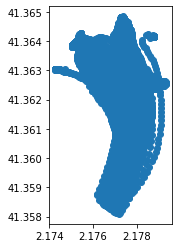

In [45]:
inner.plot()

In [58]:
dfA_n1 = dfA_n.loc[dfA_n.index.isin(inner.index)].copy()

In [59]:
dfA_n1.head()

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,shipname,shiptype,draught,to_bow,to_stern,to_starboard,to_port,imo
505,2022-06-01 01:03:59,247383500,0,-6.0,34.0,2.17667,41.35834,26.1,25.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
506,2022-06-01 01:04:10,247383500,0,-7.0,33.0,2.17678,41.35849,25.9,25.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
507,2022-06-01 01:04:20,247383500,0,-7.0,33.0,2.17686,41.35864,25.5,24.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
508,2022-06-01 01:04:30,247383500,0,-8.0,33.0,2.17695,41.35878,25.3,24.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
509,2022-06-01 01:04:40,247383500,0,-9.0,32.0,2.17704,41.35892,25.1,23.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557


In [60]:
len(inner) == len(dfA_n1)

True

In [61]:
inner.lon.mean() == dfA_n1.lon.mean()

True

In [62]:
inner.lon == dfA_n1.lon

505       True
506       True
507       True
508       True
509       True
          ... 
310936    True
310937    True
310938    True
310939    True
310940    True
Name: lon, Length: 57339, dtype: bool

In [63]:
dfA_n1.reset_index(inplace = True, drop = True)

<IPython.core.display.Javascript object>


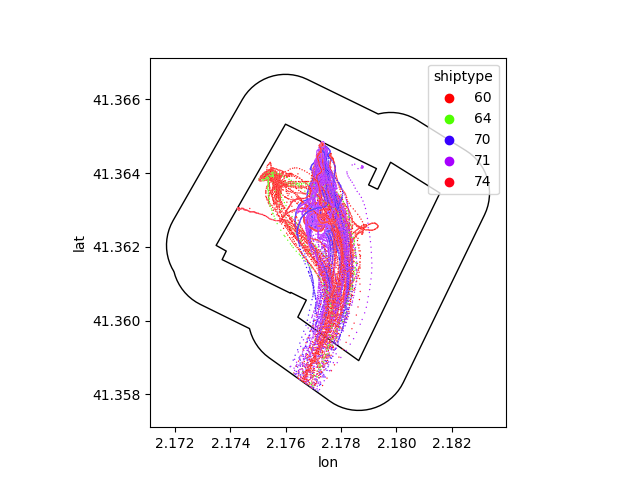

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [64]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dfA_n1, x = 'lon',y = 'lat', s = 1, hue = 'shiptype', palette = 'hsv')

In [52]:
dfA_n2 = dfA_n1.loc[(dfA_n1.lon<=lonmax)&(dfA_n1.lat<=latmax)].copy()

<AxesSubplot:xlabel='lon', ylabel='lat'>

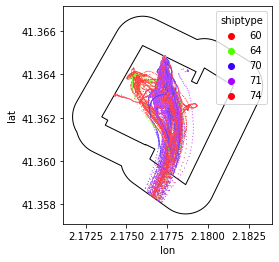

In [53]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dfA_n2, x = 'lon',y = 'lat', s = 1, hue = 'shiptype', palette = 'hsv')

# Good data obtained

In [54]:
dfA_n2

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,shipname,shiptype,draught,to_bow,to_stern,to_starboard,to_port,imo
0,2022-06-01 01:03:59,247383500,0,-6.0,34.0,2.17667,41.35834,26.1,25.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
1,2022-06-01 01:04:10,247383500,0,-7.0,33.0,2.17678,41.35849,25.9,25.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
2,2022-06-01 01:04:20,247383500,0,-7.0,33.0,2.17686,41.35864,25.5,24.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
3,2022-06-01 01:04:30,247383500,0,-8.0,33.0,2.17695,41.35878,25.3,24.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
4,2022-06-01 01:04:40,247383500,0,-9.0,32.0,2.17704,41.35892,25.1,23.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57334,2022-06-30 23:01:02,247243600,5,0.0,57.0,2.17676,41.35868,205.0,205.0,2022-06-30,CRUISE BARCELONA,60,7.2,43.0,211.0,15.0,15.0,9351488
57335,2022-06-30 23:01:03,247243600,5,0.0,57.0,2.17675,41.35865,203.9,205.0,2022-06-30,CRUISE BARCELONA,60,7.2,43.0,211.0,15.0,15.0,9351488
57336,2022-06-30 23:01:05,247243600,5,0.0,57.0,2.17672,41.35860,203.9,206.0,2022-06-30,CRUISE BARCELONA,60,7.2,43.0,211.0,15.0,15.0,9351488
57337,2022-06-30 23:01:10,247243600,5,0.0,59.0,2.17664,41.35848,205.0,206.0,2022-06-30,CRUISE BARCELONA,60,7.2,43.0,211.0,15.0,15.0,9351488


In [55]:
gdfA_n2 = gpd.GeoDataFrame(dfA_n2[['mmsi','lon','lat', 'shiptype']], geometry = gpd.points_from_xy(dfA_n2.lon, dfA_n2.lat),crs = dm_map.crs)

In [56]:
len (gdfA_n2) == len(dfA_n2)

True

## Data testing

In [57]:
inner1 = gpd.sjoin(gdfA_n2, dm_buffer)

In [58]:
len(inner1)

56515

Check is good

# Save data

In [59]:
dfA_n2.to_csv(projPath_save + month + darsena +'_dfA_n2_solution_z2_150.csv', index = False, columns = ['time_stamp','mmsi','status','turn','speed','lon','lat','course','heading', 'day','shipname','shiptype','draught','to_bow','to_stern', 'to_starboard','to_port', 'imo'])